<a href="https://colab.research.google.com/github/ToshikiShimizu/PyTorch/blob/master/intro_dev/chapter2/Untitled0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
!pip install torch

In [0]:
import torch

In [0]:
w_true = torch.Tensor([1,2,3])
X = torch.cat([torch.ones(100,1),torch.randn(100,2)],1)
y = torch.mv(X, w_true)+torch.randn(100)*0.5
w = torch.randn(3,requires_grad=True)
gamma = 0.1

In [0]:
losses = []
for epoc in range(100):
  w.grad = None
  y_pred = torch.mv(X,w)
  loss = torch.mean((y-y_pred)**2)
  loss.backward()
  
  w.data = w.data - gamma * w.grad.data
  losses.append(loss.item())

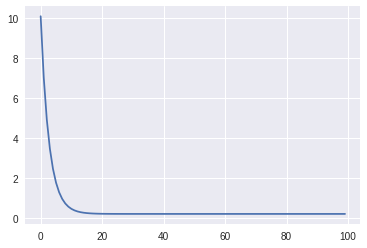

In [17]:
%matplotlib inline
from matplotlib import pyplot as plt
plt.plot(losses)

In [18]:
w

tensor([1.0084, 2.0036, 2.9797], requires_grad=True)

In [0]:
from torch import nn , optim

net = nn.Linear(in_features=3, out_features=1,bias=False)
optimizer = optim.SGD(net.parameters(),lr=0.1)
loss_fn = nn.MSELoss()

In [0]:
losses = []
for epoc in range(100):
  optimizer.zero_grad()
  y_pred = net(X)
  loss = loss_fn(y_pred.view_as(y),y)
  loss.backward()
  optimizer.step()
  losses.append(loss.item())

In [23]:
list(net.parameters())

[Parameter containing:
 tensor([[1.0084, 2.0036, 2.9797]], requires_grad=True)]

In [0]:
from sklearn.datasets import load_iris
iris = load_iris()

X = iris.data[:100]
y = iris.target[:100]

X = torch.tensor(X, dtype=torch.float32)
y = torch.tensor(y, dtype=torch.float32)

In [0]:
net = nn.Linear(4,1)
loss_fn = nn.BCEWithLogitsLoss()
optimizer = optim.SGD(net.parameters(),lr=0.25)

In [0]:
losses = []
for epoc in range(100):
  optimizer.zero_grad()
  y_pred = net(X)
  loss = loss_fn(y_pred.view_as(y),y)
  loss.backward()
  optimizer.step()
  losses.append(loss.item())

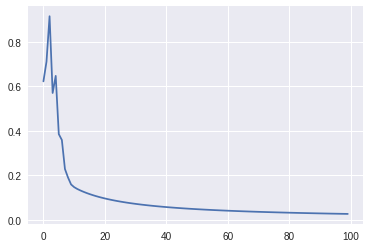

In [36]:
%matplotlib inline
from matplotlib import pyplot as plt
plt.plot(losses)

In [40]:
h = net(X)
prob = torch.sigmoid(h)
y_pred = prob > 0.5
(y.byte() == y_pred.view_as(y)).sum().item()

100

In [0]:
from sklearn.datasets import load_digits
digits = load_digits()
X = digits.data
y = digits.target
X = torch.tensor(X,dtype=torch.float32)
y = torch.tensor(y,dtype=torch.int64)

In [0]:
net = nn.Linear(X.size()[1],10)
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(),lr=0.01)

In [0]:
losses = []
for epoc in range(100):
  optimizer.zero_grad()
  y_pred = net(X)
  loss = loss_fn(y_pred, y)
  loss.backward()
  optimizer.step()
  losses.append(loss.item())

In [51]:
_, y_pred = torch.max(net(X),1)
(y_pred == y).sum().item() / len(y)

0.9471341124095715